In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [2]:
df_segmentation =pd.read_csv(r'C:\Users\admin\Desktop\segmentation data.csv',index_col=0)

In [3]:
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [4]:
df_segmentation .describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


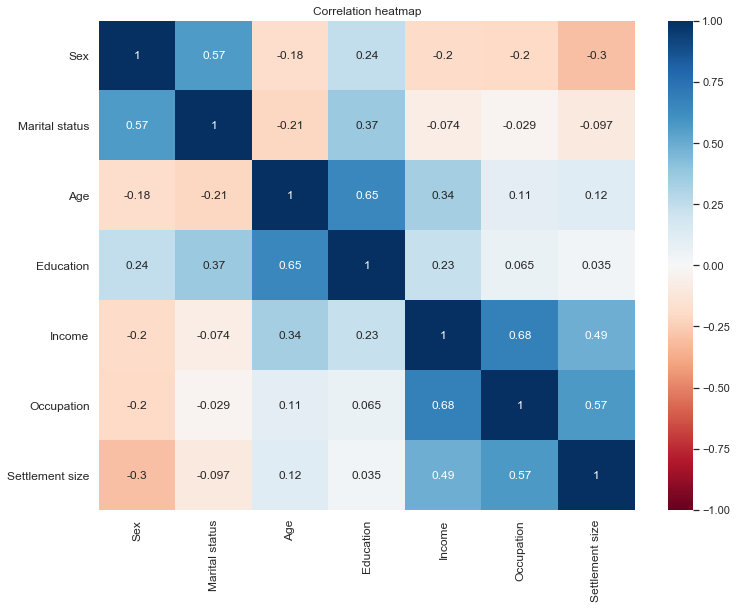

In [6]:
plt.figure(figsize=(12,9))

s=sns.heatmap(df_segmentation.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)

plt.title('Correlation heatmap')
plt.show()

Text(0.5, 1.0, 'Visulization of Raw Data')

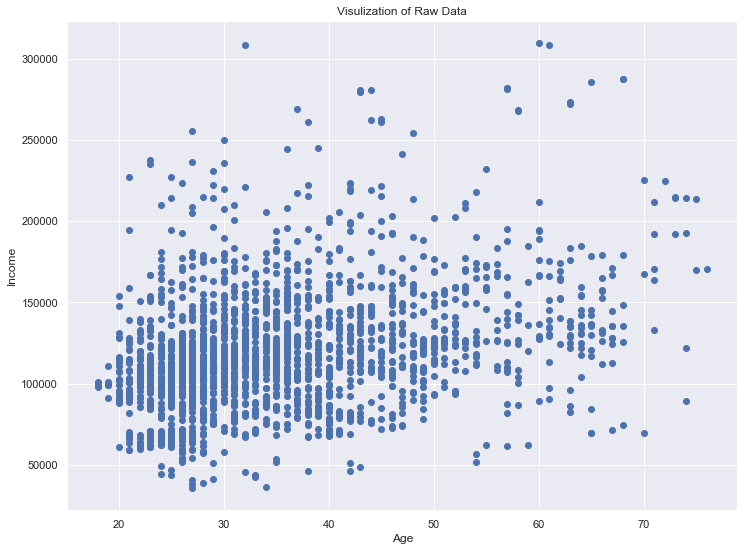

In [8]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visulization of Raw Data')

In [9]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_segmentation)

# Hierarchical Clustering

In [10]:
hier_clust=linkage(scaled_data,method='ward')

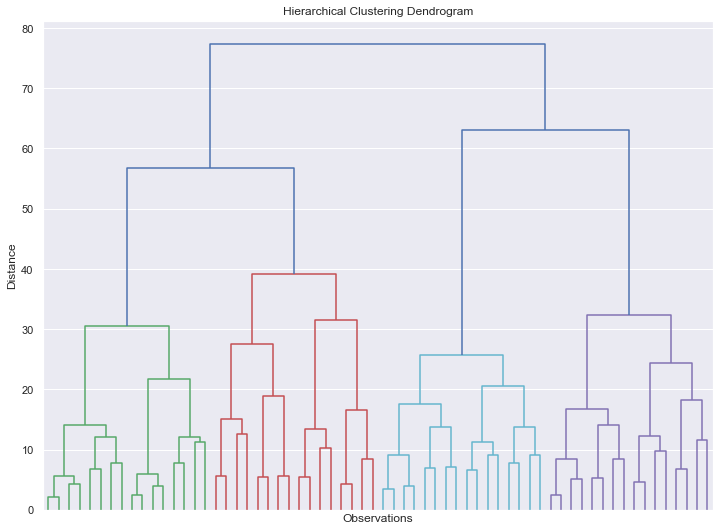

In [11]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=5)
plt.show()

# K-Means Clustering

In [12]:
wcss=[]

In [13]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

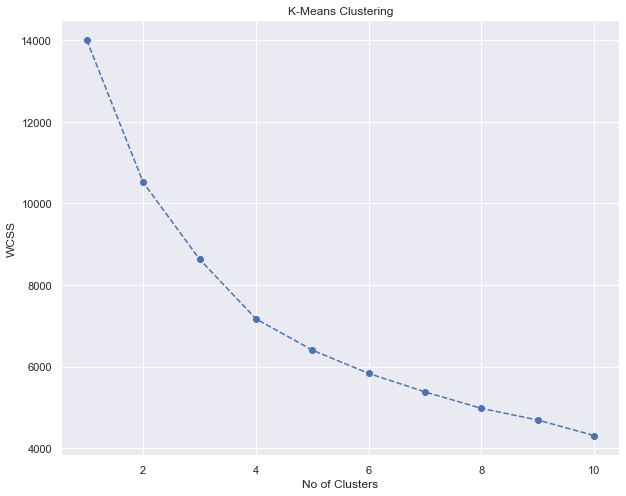

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel("No of Clusters")
plt.ylabel('WCSS')
plt.title('K-Means Clustering')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [16]:
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
data=df_segmentation.copy()

In [19]:
data['Segment K-Means']=kmeans.labels_

In [21]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-Means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


In [22]:
data_segment_analysis=data.groupby(['Segment K-Means']).mean()
data_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [23]:
data_segment_analysis['N obs']=data[['Segment K-Means','Sex']].groupby(['Segment K-Means']).count()

In [24]:
data_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N obs
Segment K-Means,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705


In [25]:
data_segment_analysis['Prop Obs']=data_segment_analysis['N obs']/data_segment_analysis['N obs'].sum()

In [26]:
data_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N obs,Prop Obs
Segment K-Means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [27]:
data_segment_analysis.rename({0:'Well-Off',1:'Fewer-Opportunities',2:'Standard',3:'Career Focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N obs,Prop Obs
Segment K-Means,,,,,,,,,
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer-Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Career Focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [28]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-Means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


In [29]:
data['Labels']=data['Segment K-Means'].map({0:'Well-Off',1:'Fewer-Opportunities',2:'Standard',3:'Career Focused'})

In [30]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-Means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,Well-Off
100000002,1,1,22,1,150773,1,2,3,Career Focused
100000003,0,0,49,1,89210,0,0,1,Fewer-Opportunities
100000004,0,0,45,1,171565,1,1,2,Standard
100000005,0,0,53,1,149031,1,1,2,Standard
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,Fewer-Opportunities
100001997,1,1,27,1,117744,1,0,3,Career Focused
100001998,0,0,31,0,86400,0,0,1,Fewer-Opportunities


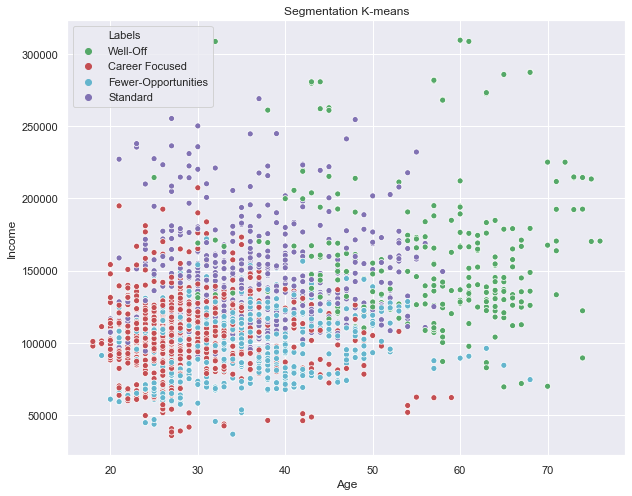

In [31]:
x_axis=data['Age']
y_axis=data['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=data['Labels'],palette=['g','r','c','m'])
plt.title("Segmentation K-means")
plt.show()

# PCA

In [32]:
pca=PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative explained variance')

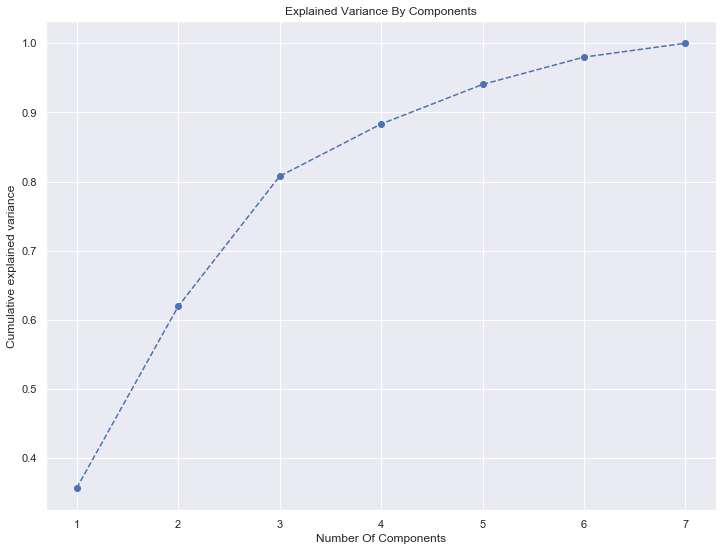

In [34]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance By Components')
plt.xlabel('Number Of Components')
plt.ylabel('Cumulative explained variance')

In [35]:
pca=PCA(n_components=3)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [37]:
df_pca_comp=pd.DataFrame(data=pca.components_ , columns=df_segmentation.columns.values,index=['Component 1','Component 2','Component 3'])

In [38]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x218cb9f3f48>,
 <a list of 3 Text yticklabel objects>)

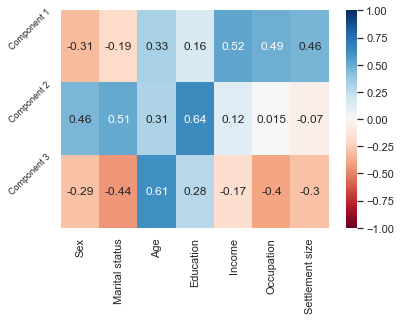

In [39]:
sns.heatmap(df_pca_comp,vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.yticks([0,1,2],['Component 1','Component 2','Component 3','Component 4'],rotation=45,fontsize=9)

In [40]:
scores_pca=pca.transform(scaled_data)

In [41]:
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

# K-Means Clustering With PCA

In [42]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [ ]:
wcss

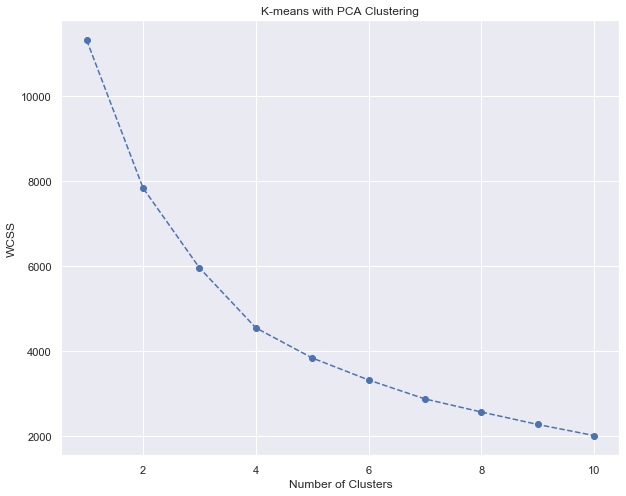

In [43]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [44]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [45]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# K-Means Clustering With PCA Results

In [46]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [47]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [48]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [49]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
career focused,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
fewer opportunities,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
well-off,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [50]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})


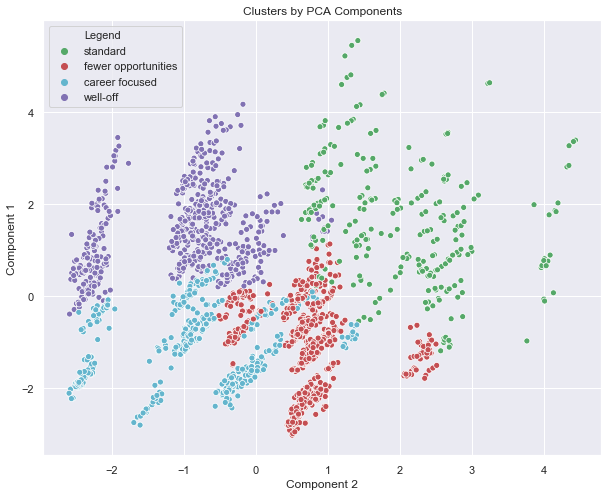

In [51]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

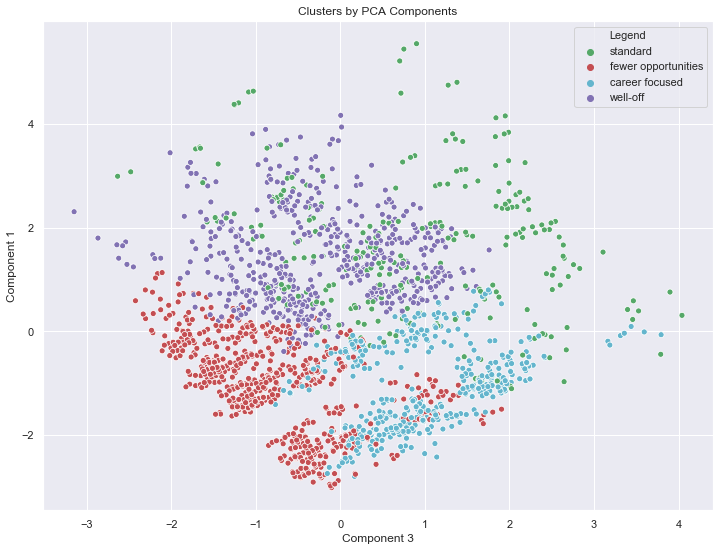

In [52]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis_1, y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()

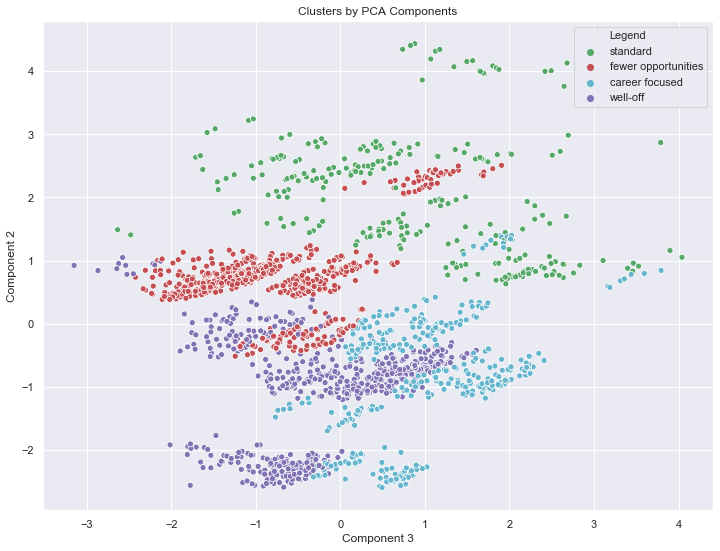

In [53]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis_1, y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()


# Data Export

In [54]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [55]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [56]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))